#### EP4130: Data Science Analysis

#### Assignment 3

#### Tanmay Goyal- AI20BTECH11021

In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

**Question 1**

Draw a histogram of the median of 10000 bootstrap samples drawn from a Gaussian with mean 0 and standard deviation 1. The standard deviation of the sample median of a Gaussian distribution is equal to $\sqrt{\frac{\pi}{2n}}$. Overlay a Gaussian distribution with mean equal to that of the generated data, and standard deviation equal to the standard_deviation of that of the median.

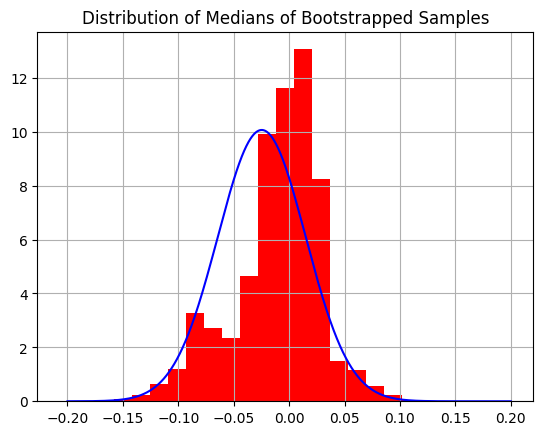

In [6]:
# generating 1000 data points from Gaussian with mean 0 and variance 1
data = np.random.normal(0 , 1 , 1000)

# we now generate 10000 bootstrapped samples, each having 1000 numbers
# since median involves sorting, we expect all the 10000 samples to have same median
# but when we randomly generate indices for bootstrapping, replacement is allowed
# hence, each of the 10000 samples will have different median

medians = []

for i in range(10000):

    # generating 1000 random indices with replacement True, which allows for repitition of data
    indices = np.random.choice(np.linspace(0 , 1000 , 1000 , endpoint = False,dtype = np.int64) , 1000 , replace = True)

    # making the data
    bootstrapped_data = np.array([data[i] for i in indices])

    # appending the median
    medians.append(np.median(bootstrapped_data))


# plotting the histogram for the data
plt.hist(medians , bins = 20 , color = 'red' , density = True)

# overlaying the Gaussian
mu = np.mean(data)
std = np.sqrt(np.pi /(2 * 1000))

# generating the pmf values
x = np.linspace(-0.2 , 0.2 , 1000)
y = sp.stats.norm.pdf(x , mu , std)

# plotting the Gaussian
plt.plot(x , y , 'b-')
plt.grid()
plt.title("Distribution of Medians of Bootstrapped Samples")
plt.show()

**Question 2**

Use standarad Linear Algebra method to fit the straight line $y = mx + b$ to the $x , y , \sigma_y$ datapoints given below. Make a plot showing the points, bestfit lines and their uncertainity. 

In [12]:
data = np.array([
 [203 ,495 ,21], 
 [58 ,173  ,15], 
 [210 ,479 ,27], 
 [202 ,504 ,14], 
 [198 ,510 ,30], 
 [158 ,416 ,16], 
 [165 ,393 ,14], 
 [201 ,442 ,25], 
 [157 ,317 ,52], 
 [131 ,311 ,16], 
 [166 ,400 ,34], 
 [160 ,337 ,31], 
 [186 ,423 ,42], 
 [125 ,334 ,26], 
 [218 ,533 ,16], 
 [146 ,344 ,22]])

In [1]:
x_coords = data[ : , 0]
y_coords = data[ : , 1]
uncertainities = data[ : , 2]

def polyn(x , m , b):
    return m * x + b

optimal_param , optimal_cov = sp.optimize.curve_fit(polyn , x_coords , y_coords , sigma = uncertainities)

print("The optimal values of m and b are {} and {} respectively".format(optimal_param[0] , optimal_param[1]))

# getting x_axis
x_min = np.min(x_coords)
x_max = np.max(x_coords)
x = np.linspace(x_min , x_max , 1000)

plt.plot(x_coords , y_coords , 'ro')
plt.plot(x , polyn(x , optimal_param[0] , optimal_param[1]) , 'r-')
plt.errorbar(x_coords , y_coords , yerr = uncertainities)
plt.grid()
plt.title("Best Fitting Line using Chi Square Minimization along with Error Bars")
plt.show()

NameError: name 'data' is not defined

**Question 3**

Calculate the p-value for the four chi-square values for the plot shown in
class from astroMl book which can be found at https://www.astroml.org/book_figures_1ed/chapter4/fig_chi2_eval.html.

In [29]:
chi_square_reduced = [0.96 , 0.24 , 3.84 , 2.85]

# Number of data points (taken from the original code)
N = 50

# Number of free parameters
M = 1 # since all the estimations ahve been done with a line of the form y = k

# Degrees of Freedom
dof = N - M

for idx , chi_dof in enumerate(chi_square_reduced):
    chi_square = chi_dof * dof
    p_value = 1 - sp.stats.chi2(dof).cdf(chi_square)

    print("For plot {} , the p-value is {} and the Chi-Square Value is {}".format(idx + 1 , p_value , chi_square))

For plot 1 , the p-value is 0.5529264339960218 and the Chi-Square Value is 47.04
For plot 2 , the p-value is 0.9999999917009567 and the Chi-Square Value is 11.76
For plot 3 , the p-value is 0.0 and the Chi-Square Value is 188.16
For plot 4 , the p-value is 1.2107292945984227e-10 and the Chi-Square Value is 139.65
